### Critical Variables Declaration

In [7]:
# Critical Variables Declaration

problemtype = 'regression'
train_file_path = 'Data/Input/train.csv'
test_file_path = 'Data/Input/test.csv'
target_column_name = 'median_house_value'
is_load_into_sql = False

### Clean and Preprocess Data

In [6]:
from DataPreprocessing.Preprocessing import DataPreprocess

dpp = DataPreprocess(train_file_path, target_column_name, is_load_into_sql)
df, x_train, y_train, x_test, y_test, columns, categorical_columns = dpp.read_and_preprocess_data()
x_train.head(5)

Step 1 - File Read Complete ...
Step 2 - Categorical Column Identification Complete ...
Step 3 - One Hot Encoding Complete ...
Step 4 - Null Value Imputation Complete ...
Step 5 - Standardisation Complete ...
Step 5 - Train Test Splitting Complete ...
Shape:(16512, 12)


,one_hot_encoded__NEAR BAY,total_rooms,one_hot_encoded__1H OCEAN,housing_median_age,total_bedrooms,longitude,one_hot_encoded__ISLAND,one_hot_encoded__INLAND,median_income,population,households,latitude
15961,1.0,-0.561874,0.0,1.856182,-0.600755,-1.427661,0.0,0.0,-0.357869,-0.482568,-0.568998,0.972957
1771,1.0,-0.527495,0.0,1.061601,-0.591215,-1.387731,0.0,0.0,-0.137527,-0.401327,-0.514070,1.085321
16414,0.0,-1.185280,0.0,-1.004309,-1.259064,-0.833696,0.0,1.0,-0.655694,-1.241111,-1.290906,1.061912
5056,0.0,1.183664,1.0,0.425936,2.476120,0.608792,0.0,0.0,-1.240342,1.865470,2.279397,-0.754652
8589,0.0,-0.359725,1.0,0.743768,-0.491037,0.588827,0.0,0.0,1.823862,-0.596482,-0.485299,-0.815516


### Visualize Target Relationship

In [ ]:
# Visualise Data
from Visualisation.Visualisation import Visualisation 

# Visualise Relationship of Target with Each Columns
vs = Visualisation(x_train, y_train, target_column_name, columns)
vs.draw_relationship_out_in()


### Visualize Variable Corelation

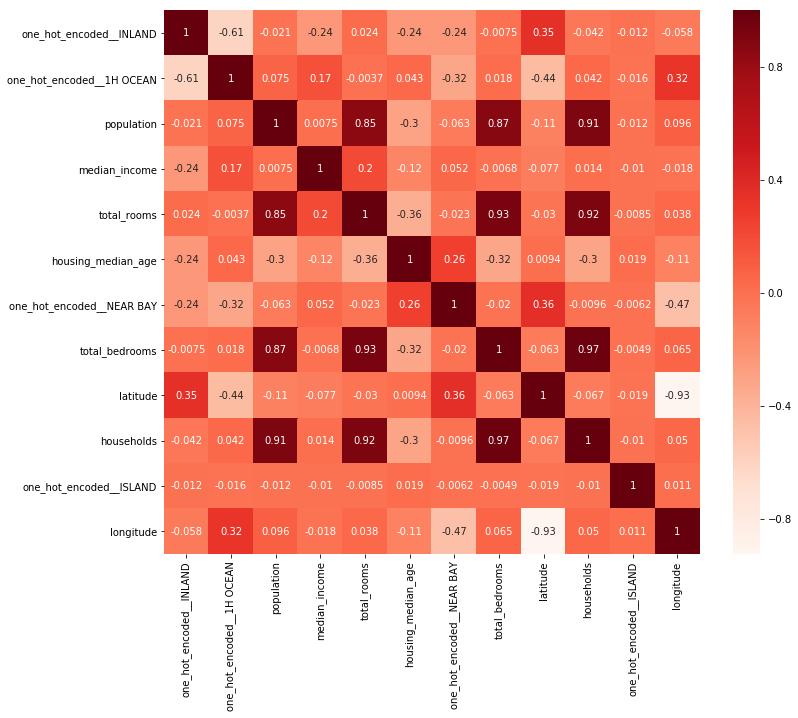

In [11]:
# Visualise Data
from Visualisation.Visualisation import Visualisation 

# Show Variable Corelation
vs = Visualisation(x_train, y_train, target_column_name, [])
vs.show_variable_corelation()

### Show Cross Validated Scores

In [12]:
# Show Baseline Cross Validated Score
from Algorithms.RandomForest.RandomForest import RandomForest 
from Algorithms.GradientBoosting.GradientBoosting import GradientBoosting 
from Algorithms.KMeansClustering.KMeansClustering import KMeansClustering 
from Algorithms.GradientBoosting.XGBoosting import XGBoosting 

# Random Forest Score
rf = RandomForest(x_train, y_train, problemtype, 10)
rf.show_cross_val_score()

# # Gradient Boosting Score
gb = GradientBoosting(x_train, y_train, problemtype, 10)
gb.show_cross_val_score()

# # KMeans Clustering Score
km = KMeansClustering(x_train, y_train, problemtype, 10)
km.show_cross_val_score()

# # XGBoost Score
xgb = XGBoosting(x_train, y_train, problemtype, 10)
xgb.show_cross_val_score()



Random Forest Cross Validated Score...
0.80261224577318


Gradient Boosting Cross Validated Score...
0.7724254158521762


KMeans Cross Validated Score...
0.7141037289362809




c:\anaconda3\envs\python36\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

c:\anaconda3\envs\python36\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



XGB Cross Validated Score...
0.7722705826218285


